In [60]:
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv(r'spam.csv',encoding='ISO-8859-1')

In [63]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4460,ham,Thanks again for your reply today. When is ur ...,NaN,NaN,NaN
5324,ham,"Dear Sir,Salam Alaikkum.Pride and Pleasure mee...",NaN,NaN,NaN
5522,ham,Thats cool. I want to please you...,NaN,NaN,NaN
889,ham,Wife.how she knew the time of murder exactly,NaN,NaN,NaN
101,ham,I'm still looking for a car to buy. And have n...,NaN,NaN,NaN


In [64]:
df.shape

(5572, 5)

## Data Cleaning

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [66]:
df.rename(columns = {'v1':'class_label', 'v2':'message'}, inplace = True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [67]:
df.sample(5)

,class_label,message
3091,ham,"Dear, take care. I am just reaching home.love ..."
4522,ham,Actually I decided I was too hungry so I haven...
3673,spam,You have won a Nokia 7250i. This is what you g...
721,ham,S'fine. Anytime. All the best with it.
5483,ham,So li hai... Me bored now da lecturer repeatin...


In [68]:
#exploring the dataset
df['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

In [69]:
df.sample(5)

,class_label,message
1865,ham,Call to the number which is available in appoi...
1307,spam,"Get 3 Lions England tone, reply lionm 4 mono o..."
3017,ham,I didn't get the second half of that message
2191,ham,Thankyou so much for the call. I appreciate yo...
1265,ham,Im in inperialmusic listening2the weirdest tra...


In [70]:
df['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

In [72]:
import matplotlib.pyplot as ab
import numpy as np
labels = ['ham', 'spam']
counts = [4825, 747]
y = np.arange(len(labels)) #converting text labels to numberic value, 0 and 1
y

array([0, 1])

<BarContainer object of 2 artists>

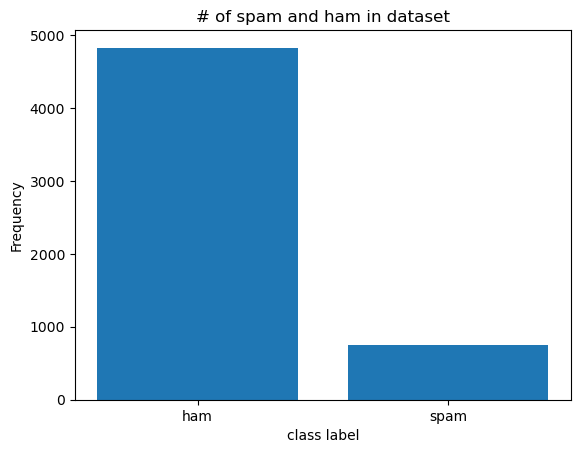

In [73]:
ab.xticks(ypos, labels)
ab.xlabel("class label")
ab.ylabel("Frequency")
ab.title("# of spam and ham in dataset")
ab.bar(y, counts)


In [74]:
df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [75]:
#separate both classes
df_ham = df[df.class_label=='ham']
df_spam = df[df.class_label=='spam']

#convert to list

ham_list=df_ham['message'].tolist()
spam_list= df_spam['message'].tolist()


filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_spam = filtered_spam.lower()

filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()


In [77]:
import os
from wordcloud import WordCloud
from PIL import Image
comment_mask = np.array(Image.open("comment.png"))

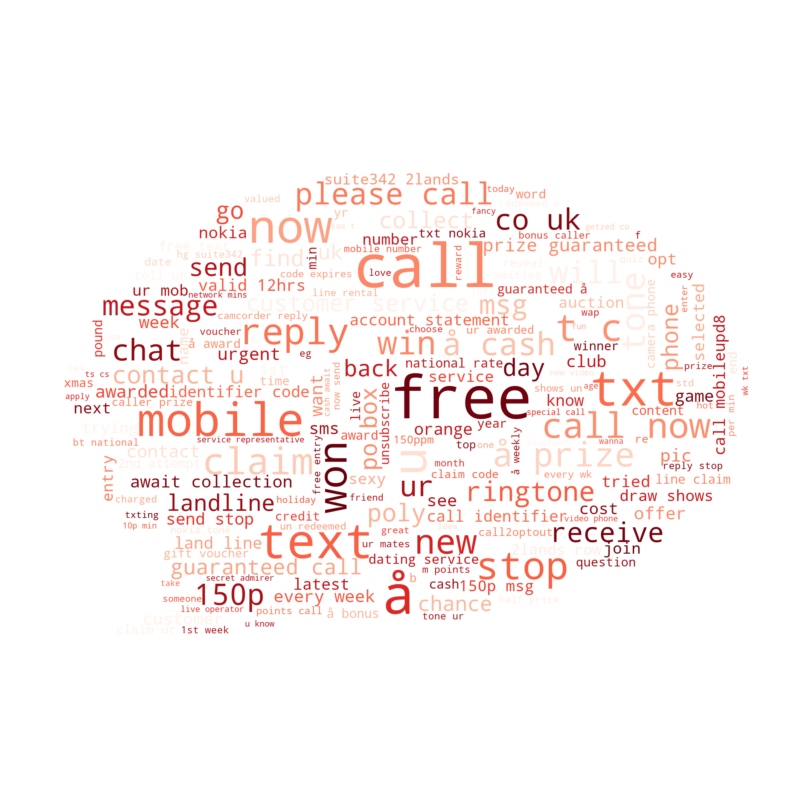

In [78]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Reds").generate(filtered_spam)
 
# Display the generated image

ab.figure(figsize=[20,10])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")

ab.margins(x=0, y=0)

ab.show()

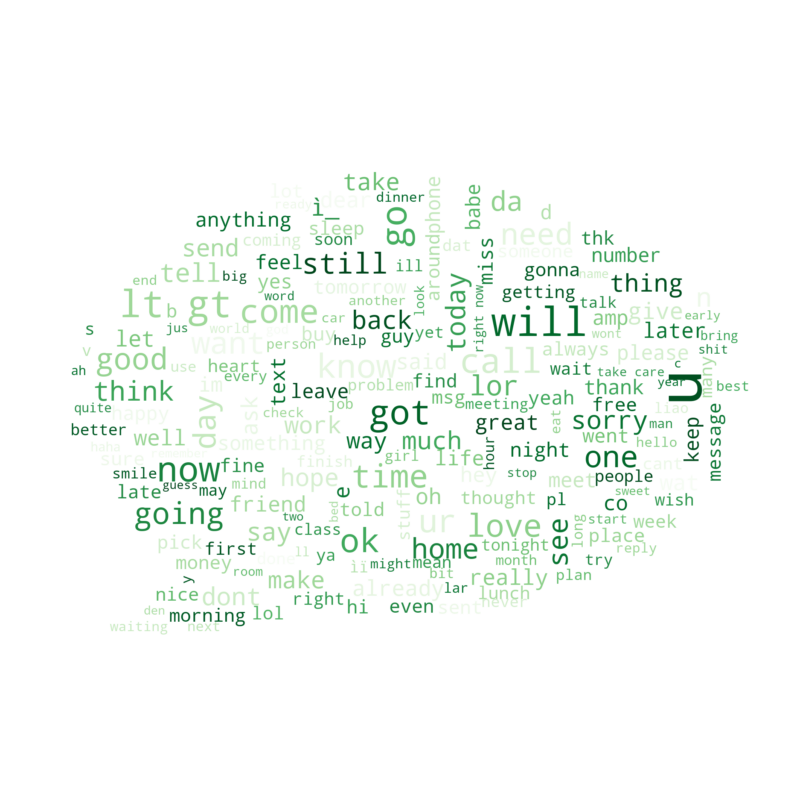

In [79]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Greens").generate(filtered_ham)
 
# Display the generated image

ab.figure(figsize=[20,10])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")

ab.margins(x=0, y=0)

ab.show()

In [80]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)

In [81]:
from sklearn.model_selection import train_test_split
# 30% test, 70% train split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size = 0.3, random_state = 0)

print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))
type(x_train)

rows in test set: (1672,)
rows in train set: (3900,)


pandas.core.series.Series

## TF-ID Vectorizer

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize email text into tfidf matrix
# TfidfVectorizer converts collection of raw documents to a matrix of TF-IDF features.
# It's equivalent to CountVectorizer followed by TfidfTransformer.
list = x_train.tolist()
vectorizer = TfidfVectorizer(
    input= list ,  # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(list) #gives tf idf vector
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector

In [83]:
from sklearn.naive_bayes import MultinomialNB

# train a classifier
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

In [84]:
# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 96.41%


In [85]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = y_test.tolist() 
predicted = labels 
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted) )

score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1434    0]
 [  60  178]]
Accuracy Score : 0.9641148325358851
Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       1.00      0.75      0.86       238

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.96      0.96      1672

F-Measure: 0.856


<AxesSubplot:>

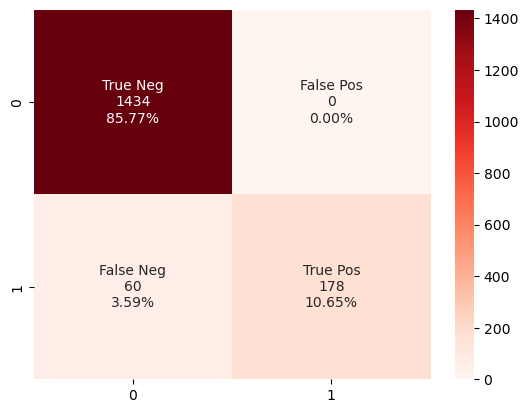

In [86]:
#heatmap for confusion matrix
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds')

## Count Vectorizer

In [87]:
list = x_train.tolist()
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents = ascii) #initialize countVectorizer.
word_count_vector=cv.fit_transform(list) #get the document-term matrix.
print(word_count_vector.shape) #see the rows and columns of this matrix

(3900, 7127)


In [88]:
cv.vocabulary_

{'mathews': 3970,
 'or': 4502,
 'tait': 6066,
 'edwards': 2311,
 'anderson': 844,
 'ok': 4449,
 'take': 6069,
 'care': 1489,
 'umma': 6480,
 'to': 6297,
 'you': 7095,
 'too': 6333,
 'don': 2197,
 'make': 3920,
 'life': 3714,
 'stressfull': 5913,
 'always': 818,
 'find': 2589,
 'time': 6267,
 'laugh': 3652,
 'it': 3417,
 'may': 3982,
 'not': 4371,
 'add': 703,
 'years': 7070,
 'your': 7100,
 'but': 1411,
 'surely': 6009,
 'adds': 710,
 'more': 4144,
 'ur': 6542,
 'gud': 2971,
 'ni8': 4313,
 'swt': 6044,
 'dreams': 2234,
 'great': 2944,
 'new': 4304,
 'offer': 4434,
 'double': 2212,
 'mins': 4069,
 'txt': 6448,
 'on': 4465,
 'best': 1180,
 'orange': 4506,
 'tariffs': 6091,
 'and': 843,
 'get': 2832,
 'latest': 3650,
 'camera': 1460,
 'phones': 4701,
 'free': 2704,
 'call': 1442,
 'mobileupd8': 4111,
 '08000839402': 45,
 'now': 4383,
 '2stoptxt': 365,
 'cs': 1905,
 'the': 6186,
 'beauty': 1138,
 'of': 4428,
 'is': 3407,
 'in': 3310,
 'next': 4311,
 'second': 5410,
 'which': 6813,
 'hides'

In [89]:
x_test_vector = cv.transform(x_test)

In [90]:
# train a classifier
classifier = MultinomialNB()
classifier.fit(word_count_vector, y_train)

MultinomialNB()

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

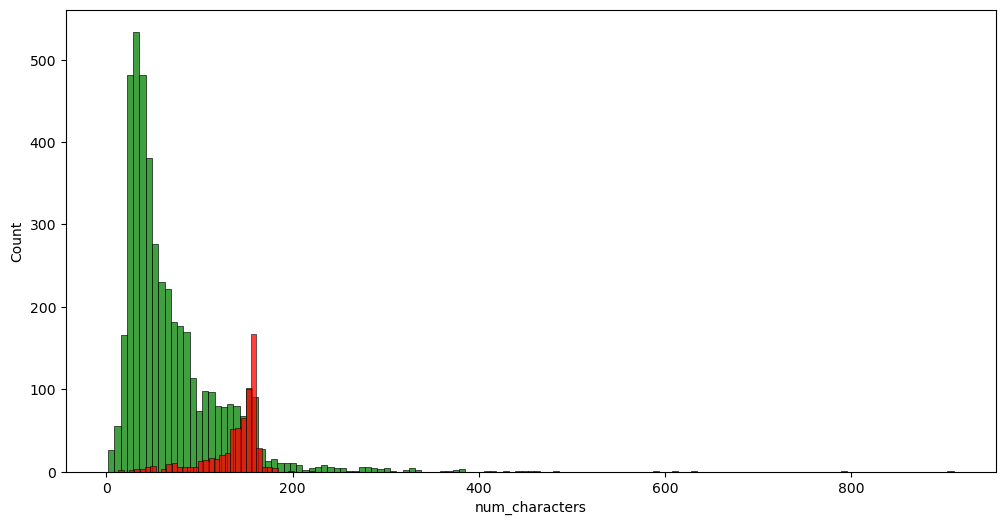

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

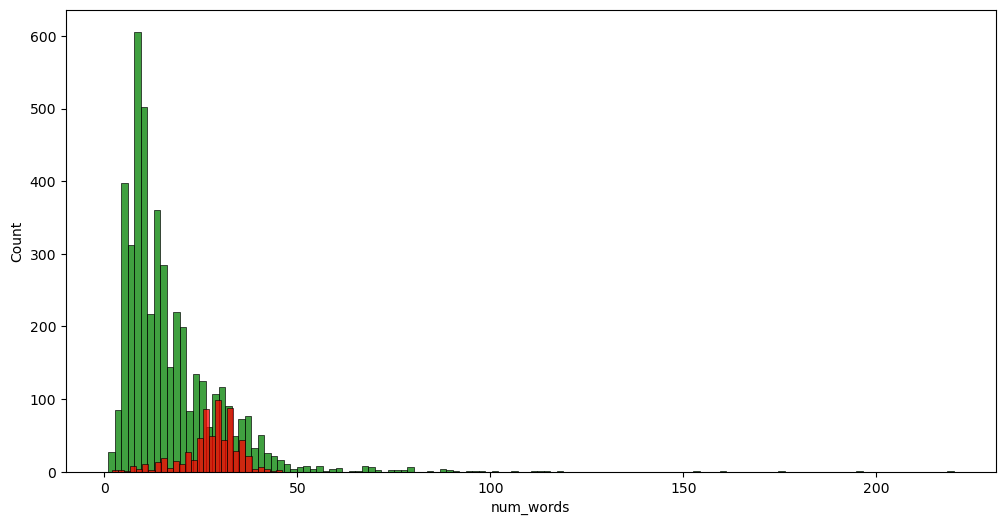

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

In [91]:
# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(x_test_vector, y_test) * 100))

classifier accuracy 98.44%


In [92]:
labels = classifier.predict(x_test_vector)


  
actual = y_test
predicted = labels 
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1427    7]
 [  19  219]]
Accuracy Score : 0.9844497607655502
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1434
           1       0.97      0.92      0.94       238

    accuracy                           0.98      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.98      0.98      0.98      1672

F-Measure: 0.944


<AxesSubplot:>

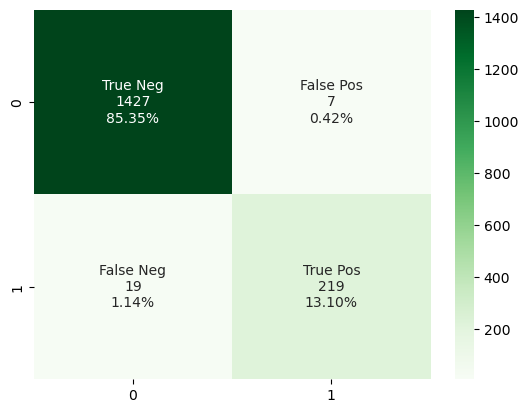

In [93]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Greens')

In [94]:
from sklearn.model_selection import cross_val_score

X=df["message"].tolist()
Y=df["class_label"].tolist()
df

classifier = MultinomialNB()

cv = CountVectorizer(strip_accents = ascii) #initialize countVectorizer.
word_count_vector=cv.fit_transform(X) #get the document-term matrix.
#print(word_count_vector.shape) #see the rows and columns of this matrix

scores=cross_val_score(classifier,word_count_vector,Y,cv=10,scoring='accuracy')

print(scores)

print(scores.mean())

[0.98387097 0.98028674 0.98025135 0.98384201 0.98025135 0.98025135
 0.98204668 0.98384201 0.97127469 0.98922801]
0.9815145138768233


In [95]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(classifier,word_count_vector, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)
conf_mat

array([[4758,   67],
       [  36,  711]], dtype=int64)

<AxesSubplot:>

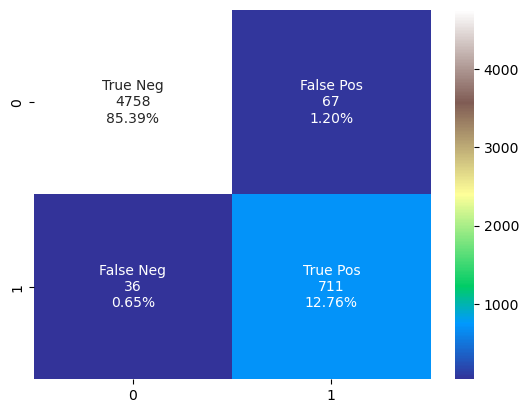

In [96]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='terrain')

In [97]:
vectorizer = TfidfVectorizer(
    input= list ,  # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(X) #gives tf idf vector
#features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector

classifier = MultinomialNB()

scores=cross_val_score(classifier,features_train_transformed,Y,cv=10,scoring='accuracy')

print(scores)

print(scores.mean())

[0.98387097 0.97849462 0.96947935 0.97845601 0.96947935 0.96768402
 0.97127469 0.97307002 0.97307002 0.98025135]
0.9745130402887975


In [98]:
y_pred = cross_val_predict(classifier,features_train_transformed, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)
conf_mat

array([[4824,    1],
       [ 141,  606]], dtype=int64)

<AxesSubplot:>

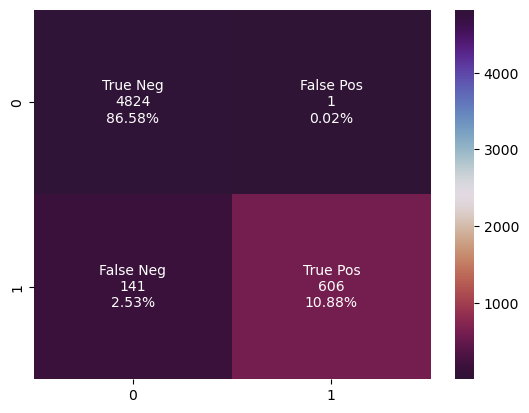

In [99]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='twilight_shifted_r')